In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Training Data.csv')

In [3]:
import numpy as np

In [4]:
df = df[df['STATE']!= "Uttar_Pradesh[5]"]

In [5]:
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,251257.000000,2.512570e+05,251257.000000,251257.000000,251257.000000,251257.000000,251257.000000
mean,125988.200468,4.999036e+06,49.963838,10.085988,6.335035,11.997628,0.122978
std,72740.884598,2.878263e+06,17.055859,6.003394,3.648636,1.399003,0.328412
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,62994.000000,2.506726e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,125984.000000,5.002101e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,188979.000000,7.478707e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


## In the graph below it Show that Uttar Pradesh have the highest amount of data

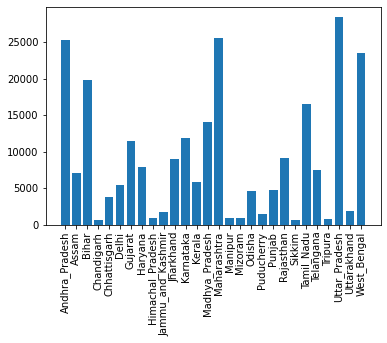

In [6]:
state_group = df.groupby('STATE')
Age = state_group.count()['Age']

keys = [pair for pair,x in state_group]
plt.bar(keys,Age)
plt.xticks(rotation="vertical")
plt.show()

In [74]:
df.STATE.unique()

array(['Madhya_Pradesh', 'Maharashtra', 'Kerala', 'Odisha', 'Tamil_Nadu',
       'Gujarat', 'Rajasthan', 'Telangana', 'Bihar', 'Andhra_Pradesh',
       'West_Bengal', 'Haryana', 'Puducherry', 'Karnataka',
       'Uttar_Pradesh', 'Himachal_Pradesh', 'Punjab', 'Tripura',
       'Uttarakhand', 'Jharkhand', 'Mizoram', 'Assam',
       'Jammu_and_Kashmir', 'Delhi', 'Chhattisgarh', 'Chandigarh',
       'Manipur', 'Sikkim'], dtype=object)

In [75]:
utrah_df = df[df['STATE'] == 'Uttar_Pradesh']
assam_df = df[df['STATE'] == 'Assam']

#  Feature Eng

In [25]:
#adding the owned and single rows
df['owned'] = df['House_Ownership'].map(lambda x: 1 if x == 'owned' else 0) 
df['single'] = df['Married/Single'].map(lambda x: 1 if x == 'single' else 0) 

In [35]:
#Thinking to add Scientifique field and Eng etc Proffesions
df.Profession.unique()

array(['Mechanical_engineer', 'Software_Developer', 'Technical_writer',
       'Civil_servant', 'Librarian', 'Economist', 'Flight_attendant',
       'Architect', 'Designer', 'Physician', 'Financial_Analyst',
       'Air_traffic_controller', 'Politician', 'Police_officer', 'Artist',
       'Surveyor', 'Design_Engineer', 'Chemical_engineer',
       'Hotel_Manager', 'Dentist', 'Comedian', 'Biomedical_Engineer',
       'Graphic_Designer', 'Computer_hardware_engineer',
       'Petroleum_Engineer', 'Secretary', 'Computer_operator',
       'Chartered_Accountant', 'Technician', 'Microbiologist',
       'Fashion_Designer', 'Aviator', 'Psychologist', 'Magistrate',
       'Lawyer', 'Firefighter', 'Engineer', 'Official', 'Analyst',
       'Geologist', 'Drafter', 'Statistician', 'Web_designer',
       'Consultant', 'Chef', 'Army_officer', 'Surgeon', 'Scientist',
       'Civil_engineer', 'Industrial_Engineer', 'Technology_specialist'],
      dtype=object)

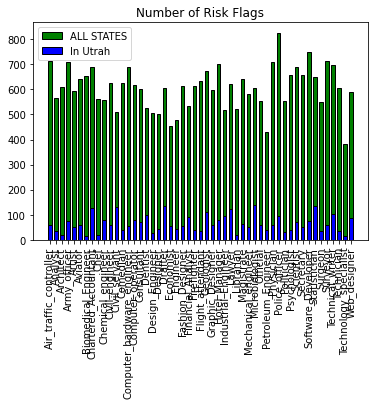

In [68]:
# df.groupby('Profession')['Profession','Risk_Flag'].sum()
#this bar graph below shows us that the banks dont take Professions into consideration 
#since that every field and sectors have Risk Flags = 1 
width = 0.55
Professions = df.groupby('Profession')
UProfessions = utrah_df.groupby('Profession')
RFlag = Professions.sum()['Risk_Flag']
URFlag = UProfessions.sum()['Risk_Flag']
UPkeys = [par for par ,x in UProfessions]
Pkeys = [par for par ,x in Professions]
plt.bar(Pkeys,RFlag,width = width, edgecolor = 'black',color="g",label="ALL STATES")
plt.bar(UPkeys,URFlag,width = width, edgecolor = 'black',color="b",label="In Utrah")
plt.title('Number of Risk Flags')
plt.xticks(rotation='vertical')
plt.legend()

plt.show()

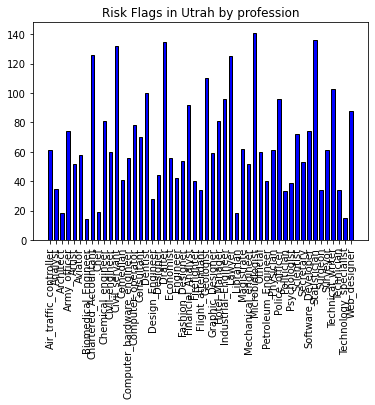

In [71]:
plt.bar(UPkeys,URFlag,width = width, edgecolor = 'black',color="b",label="In Utrah")
plt.xticks(rotation='vertical')
plt.title('Risk Flags in Utrah by profession')
plt.show()

In [185]:
assGR = assam_df.groupby('Profession')
def getData(tuple):
    return tuple[1]
def ReturnPProf(GR):
    bag = []
    for l,i in GR:
        if i['Risk_Flag'].sum() <= 1:
            bag.append((l,i['Risk_Flag'].sum()))
        continue
    bag.sort(key=getData)
    return bag[:4]

In [186]:
#ill try to get all the high profile Professions 
#by calculatin the Risk in every Profession for every State
#looping thru all the states and getting the fist lowest 20 Risk rate in Professions 
#and i will create there own Row
import numpy as np
def GetHighProff():
    high_pprof = []
    states = df.STATE.unique()
    for i in states:
        grouped_data = df[df['STATE'] == i].groupby('Profession')
        high_pprof.append(ReturnPProf(grouped_data))
    return high_pprof

def MergeALL(arr):
    All_profs = []
    for i in arr:
        for r in i:
            if r[0] in All_profs:
                continue
            All_profs.append(r[0])
    return All_profs
cleaned_arr = MergeALL(GetHighProff())

In [187]:
df['highProf'] = df['Profession'].map(lambda x: 1 if x in cleaned_arr else 0 )

In [188]:
len(cleaned_arr)

24

In [189]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,owned,single,highProf
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,0,1,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0,0,1,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0,0,0,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1,0,1,0
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1,0,1,1


In [190]:
df.corr()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,owned,single,highProf
Id,1.000000,-0.001314,-0.001787,-0.005905,-0.003466,0.002069,0.032030,0.001874,0.000817,0.002574
Income,-0.001314,1.000000,-0.001416,0.005925,0.006480,-0.002138,-0.003788,0.001533,0.001777,0.010890
Age,-0.001787,-0.001416,1.000000,0.000294,0.003070,-0.020173,-0.022827,0.019211,-0.004144,-0.009848
Experience,-0.005905,0.005925,0.000294,1.000000,0.646340,0.019687,-0.034362,0.014728,-0.002071,0.005735
CURRENT_JOB_YRS,-0.003466,0.006480,0.003070,0.646340,1.000000,0.005031,-0.016877,0.007789,0.003553,0.001986
CURRENT_HOUSE_YRS,0.002069,-0.002138,-0.020173,0.019687,0.005031,1.000000,-0.003870,0.015170,-0.008409,-0.010277
Risk_Flag,0.032030,-0.003788,-0.022827,-0.034362,-0.016877,-0.003870,1.000000,-0.023348,0.021306,0.010486
owned,0.001874,0.001533,0.019211,0.014728,0.007789,0.015170,-0.023348,1.000000,0.023214,-0.007987
single,0.000817,0.001777,-0.004144,-0.002071,0.003553,-0.008409,0.021306,0.023214,1.000000,0.006389
highProf,0.002574,0.010890,-0.009848,0.005735,0.001986,-0.010277,0.010486,-0.007987,0.006389,1.000000
